# Analysis on WeatherPy

#The plot on Latitude vs Temperature shows that the temperature is highest at the equator and lowest at the poles.
#The humidity at the equator is in the range from 50%-100%. Howeever, the trends does not change based on the latitude.
#There is no co-relation of cloudliness with respect to the latitude.
#The windspeed for most cities fall under 20 mph and no trend on the windspeed with respect to the latitude.

In [1]:
#import dependencies
import pandas as pd
import json
import random as random
import requests as req
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import datetime
import seaborn as sns
import openweathermapy.core as ow

#Retreive the current date
import datetime
now = datetime.datetime.now()

In [2]:
# Create a settings object with your API key and preferred units
api_key = "0b64dd1f2c2190bbed796f9a0d13d58b"
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}

# Generate Cities_List

In [3]:
# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,2500)
long_samples=random.sample(long,2500)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_DF=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_DF["City"]=""
cities_DF["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_DF.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_DF.set_value(index, "City", city.city_name)
    cities_DF.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the excat co-ordinates of the city
cities_DF=cities_DF.drop(cities_DF.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_DF=cities_DF.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 700 cities 
cities_DF=cities_DF.sample(n=700)

# Resetting the index of the cities list
cities_DF=cities_DF.reset_index(drop=True)

cities_DF.head()

,City,Country
0,aklavik,ca
1,halalo,wf
2,umm lajj,sa
3,tongren,cn
4,pisco,pe


# Perform API Calls

In [4]:
# Get data for each city in cities_DF
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nStarted Data Retrieval\n-----------------------------")

#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found

for index,row in cities_DF.iterrows():  
    print("\nWeather Data %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = ow.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print("\n\033[1;31mCity not found. Skipping...\033[1;30m")

print("\n-----------------------------\nData Retrieval Completed\n-----------------------------")


Started Data Retrieval
-----------------------------

Weather Data 1|aklavik,ca

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=aklavik,ca

Weather Data 2|halalo,wf

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=halalo,wf

City not found. Skipping...

Weather Data 3|umm lajj,sa

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=umm+lajj,sa

Weather Data 4|tongren,cn

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=tongren,cn

Weather Data 5|pisco,pe

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=pisco,pe

Weather Data 6|high level,ca

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=high+level,ca

Weather Data 7|tsihombe,mg

https://api.openweathermap.o


Weather Data 54|kamenka,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=kamenka,ru

Weather Data 55|mareeba,au

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=mareeba,au

Weather Data 56|emerald,au

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=emerald,au

Weather Data 57|baringo,ke

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=baringo,ke

Weather Data 58|shaunavon,ca

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=shaunavon,ca

Weather Data 59|la ronge,ca

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=la+ronge,ca

Weather Data 60|banepa,np

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&


Weather Data 109|piravam,in

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=piravam,in

Weather Data 110|mount isa,au

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=mount+isa,au

Weather Data 111|lucapa,ao

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=lucapa,ao

Weather Data 112|maridi,sd

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=maridi,sd

City not found. Skipping...

Weather Data 113|leningradskiy,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=leningradskiy,ru

Weather Data 114|woodward,us

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=woodward,us

Weather Data 115|victor harbor,au

https://api.openweathermap.org/data/2.5/weather?app


Weather Data 163|anadyr,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=anadyr,ru

Weather Data 164|san juan,ar

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=san+juan,ar

Weather Data 165|salacgriva,lv

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=salacgriva,lv

Weather Data 166|phu khieo,th

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=phu+khieo,th

City not found. Skipping...

Weather Data 167|clyde river,ca

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=clyde+river,ca

Weather Data 168|le francois,mq

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=le+francois,mq

Weather Data 169|buin,pg

https://api.openweathermap.org/data/2.5/weather?


Weather Data 217|itarema,br

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=itarema,br

Weather Data 218|velikie luki,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=velikie+luki,ru

City not found. Skipping...

Weather Data 219|peoria,us

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=peoria,us

Weather Data 220|kathu,za

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=kathu,za

Weather Data 221|tsaratanana,mg

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=tsaratanana,mg

Weather Data 222|kanigoro,id

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=kanigoro,id

Weather Data 223|okhotsk,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b6


Weather Data 271|wiwili,ni

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=wiwili,ni

Weather Data 272|tromso,no

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=tromso,no

Weather Data 273|chadan,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=chadan,ru

Weather Data 274|mrirt,ma

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=mrirt,ma

City not found. Skipping...

Weather Data 275|tooele,us

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=tooele,us

Weather Data 276|puri,in

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=puri,in

Weather Data 277|mogoytuy,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&u


Weather Data 325|shenjiamen,cn

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=shenjiamen,cn

Weather Data 326|haukipudas,fi

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=haukipudas,fi

Weather Data 327|cayenne,gf

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=cayenne,gf

Weather Data 328|port-cartier,ca

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=port-cartier,ca

Weather Data 329|xiaoshan,cn

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=xiaoshan,cn

Weather Data 330|baykit,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=baykit,ru

Weather Data 331|rikitea,pf

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a


Weather Data 380|mayo,ca

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=mayo,ca

Weather Data 381|marquette,us

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=marquette,us

Weather Data 382|moyamba,sl

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=moyamba,sl

Weather Data 383|provideniya,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=provideniya,ru

Weather Data 384|kununurra,au

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=kununurra,au

Weather Data 385|pittsburg,us

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=pittsburg,us

Weather Data 386|havoysund,no

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d5


Weather Data 435|mangrol,in

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=mangrol,in

Weather Data 436|manali,in

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=manali,in

Weather Data 437|butaritari,ki

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=butaritari,ki

Weather Data 438|belyy yar,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=belyy+yar,ru

Weather Data 439|freeport,us

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=freeport,us

Weather Data 440|kaitangata,nz

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=kaitangata,nz

Weather Data 441|corinto,ni

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d5


Weather Data 490|kruisfontein,za

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=kruisfontein,za

Weather Data 491|buchanan,lr

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=buchanan,lr

Weather Data 492|salalah,om

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=salalah,om

Weather Data 493|siuna,ni

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=siuna,ni

Weather Data 494|grand baie,mu

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=grand+baie,mu

Weather Data 495|kerrville,us

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=kerrville,us

Weather Data 496|ojinaga,mx

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13


Weather Data 545|cockburn town,tc

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=cockburn+town,tc

Weather Data 546|taoudenni,ml

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=taoudenni,ml

Weather Data 547|yulara,au

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=yulara,au

Weather Data 548|sur,om

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=sur,om

Weather Data 549|omboue,ga

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=omboue,ga

Weather Data 550|faanui,pf

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=faanui,pf

Weather Data 551|cape town,za

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imp


Weather Data 599|zyryanka,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=zyryanka,ru

Weather Data 600|bandarbeyla,so

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=bandarbeyla,so

Weather Data 601|ronneby,se

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=ronneby,se

Weather Data 602|masvingo,zw

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=masvingo,zw

Weather Data 603|sao joao da barra,br

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=sao+joao+da+barra,br

Weather Data 604|heishan,cn

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=heishan,cn

Weather Data 605|tazovskiy,ru

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c21


Weather Data 654|mahibadhoo,mv

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=mahibadhoo,mv

Weather Data 655|isangel,vu

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=isangel,vu

Weather Data 656|gonaives,ht

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=gonaives,ht

Weather Data 657|pringsewu,id

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=pringsewu,id

Weather Data 658|killybegs,ie

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=killybegs,ie

Weather Data 659|ambon,id

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=imperial&q=ambon,id

Weather Data 660|qunduz,af

https://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&un

# Weather Data_Frame

In [5]:
# Create an "extracts" object to get the various parameter required to form the weather data table
Weather_Summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*Weather_Summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness
0,Aklavik,CA,1514084400,68.22,-135.01,14.00,66,9.17,40
1,Umm Lajj,SA,1514087673,25.02,37.27,62.41,100,5.86,0
2,Tongren,CN,1514087674,27.72,109.18,52.69,53,3.91,0
3,Pisco,PE,1514084400,-13.71,-76.20,66.20,88,13.87,0
4,High Level,CA,1514084400,58.52,-117.13,10.40,85,10.29,40


In [7]:
# Save the result to a CSV file
weather_data.to_csv("Output/Weather_Data.csv")
# Count of the data in the dataframe
weather_data.count()

City           618
Country        618
Date           618
Latitude       618
Longitude      618
Temperature    618
Humidity       618
Wind speed     618
Cloudliness    618
dtype: int64

# Latitude vs Temperature Plot

In [8]:
# Creating a function to set the properties of the graph
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=12)
    plt.grid(True)

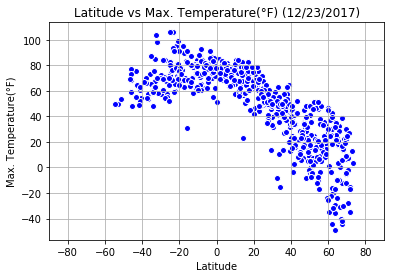

In [11]:
# Latitude vs Max. Temperature(F)
plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="blue",edgecolors="white")
plotprops("Latitude","Max. Temperature(°F)",[-90,90])
plt.savefig("Output/City Latitude vs Temperature.jpeg")
plt.show()

# Latitude vs Humidity Plot

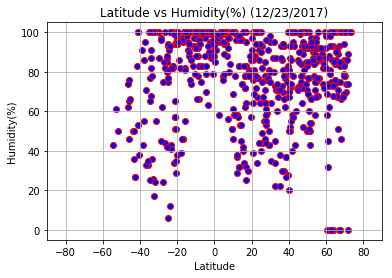

In [12]:
# Latitude vs Humidity
plt.scatter(x=weather_data["Latitude"],y=weather_data["Humidity"],facecolors="blue",edgecolors="red")
plotprops("Latitude","Humidity(%)",[-90,90])
plt.savefig("Output/City Latitude vs Humidity.jpeg")
plt.show()

# Latitude vs Cloudliness

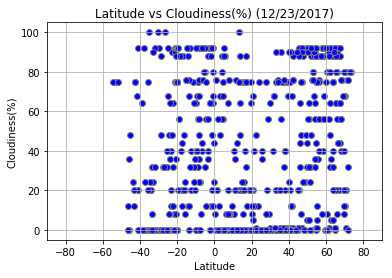

In [13]:
# Latitude vs Cloudliness  
plt.scatter(x=weather_data["Latitude"],y=weather_data["Cloudliness"],facecolors="blue",edgecolors="gray")
plotprops("Latitude","Cloudiness(%)",[-90,90])
plt.savefig("Output/City Latitude vs Cloudiness.jpeg")
plt.show()

# Latitude vs Wind Speed

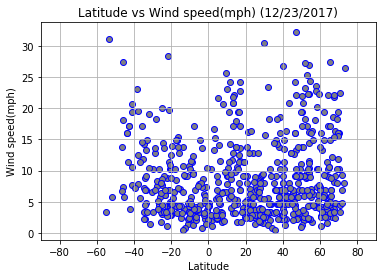

In [17]:
# Latitude vs Wind Speed  
plt.scatter(x=weather_data["Latitude"],y=weather_data["Wind speed"],facecolors="gray",edgecolors="blue")
plotprops("Latitude","Wind speed(mph)",[-90,90])
plt.savefig("Output/City Latitude vs Wind speed.jpeg")
plt.show()